Assesment1 -Q1
![alt text](image.png)

In [37]:
import logging
import sys
log=logging.getLogger('SalaryCalculator')
log.setLevel(logging.INFO)
fh=logging.FileHandler('salary.log')
log.addHandler(fh)

salaryIncrements={
(20000,40000):{'A':18,'B':14,'C':10,'d':6},
(40000,60000):{'A':15,'B':12,'C':10,'d':5},
(60000,80000):{'A':13,'B':10,'C':5,'d':None},
(80000,float('inf')):{'A':12,'B':8,'C':4,'d':None}
}

def calcSalary(Salary,Grade):
    ''' This function calculates increments in salary according to grade A,B,C and D 
    
    returns :
        incremented Salary
    '''
    try:
        if Salary <20000 or Grade not in ['A','B','C','D']:
            log.error("Salary not in grades list or salary below 20000")
            raise Exception ('Enter salary above 20000 or the grades are only A,B,C,D')
        for (lower,upper),g in salaryIncrements.items():
            if lower<=Salary <=upper:
                p=g.get(Grade)
                log.info(f'prev salary {Salary} new Salary {Salary * (1+p/100)}')
                return Salary * (1+p/100)
    except TypeError:
        print('No increments in salary')
    except :
       log.error(sys.exc_info()[0])
       print(f'Some Exception occured {sys.exc_info()[0]}')

calcSalary(180000,'D')

No increments in salary


In [2]:
salaryIncrements={
1:{'A':18,'B':14,'C':10,'d':6},
2:{'A':15,'B':12,'C':10,'d':5},
3:{'A':13,'B':10,'C':5,'d':None},
4:{'A':12,'B':8,'C':4,'d':None}
}



12

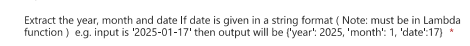

In [45]:
from datetime import datetime
try:
    date=input('Enter date in YYYY-MM-DD format')
    extract_date = lambda date_str: {'year': int(date_str[:4]), 'month': int(date_str[5:7]), 'date': int(date_str[8:])}
    print(extract_date(date))
except:
     print(f'Some Exception occured {sys.exc_info()[1]}')

{'year': 2025, 'month': 1, 'date': 1}


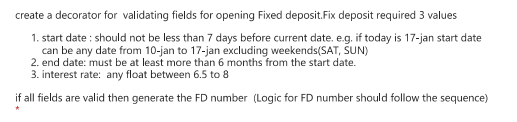

In [71]:
from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta
import logging 

log=logging.getLogger(__name__)
log.setLevel(logging.INFO)
fh=logging.FileHandler('FDidgen.log')
log.addHandler(fh)
def validate(func):
    ''' Decorator to validate start date , end date and he interest rate as per the requirements '''
    def wrapper(start,end,interest):
        try:
            current= datetime.now()-timedelta(days=7)
            prev=datetime.strptime(start,'%Y-%m-%d')
            e=datetime.strptime(end,'%Y-%m-%d')
            if  prev>current or prev.weekday()==5 or prev.weekday()==6:
                log.error('Check the start date')
                raise Exception('Check the start date')
            if e<(prev+relativedelta(months=6)):
                log.error('End date should not be with 6 months from start date')
                raise Exception('End date should not be with 6 months from start date')
            if interest <6.5 or interest >8:
                log.error('Interest must be between 6.5 - 8')
                raise Exception('Interest must be between 6.5 - 8')
            log.info('Validation passed')
            return func(start,end,interest)
        except Exception as e:
            log.error(f'error {e}')
            print(f"unexpected error {e}")
    return wrapper 

@validate
def generateFDno(start,end,interest):
    ''' Once validation is done by the decorator validate this function generates a id  
        returns FD id
    '''
    logic=f'{start[0:4]}-{end[5:7]}-{interest}'
    log.info(f'Fd id is {logic}')
    return logic

generateFDno('2025-01-01','2025-08-01',6.8)

'2025-08-6.8'

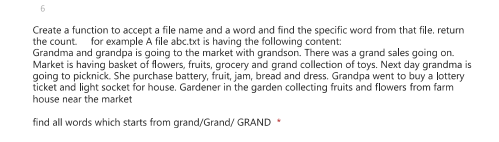

In [ ]:
import re

def findPattern(filePath,word):
    ''' 
    The function accepts a file path and the word and finds the number of occurences of the word in a file 


    returns count of the occurances 
    '''
    try:
        with open(filePath,'r') as file:
            contents=file.read()
        pattern= f'{word[0].lower()}|{word[0].upper()}{word[1:].lower()}|{word[1:].upper()}|{word[-1].upper()}'
        matches = re.findall(pattern, contents)

        count = len(matches)
        return count
        
    except FileNotFoundError:
        print(f"The file at {filePath} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

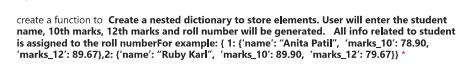

In [ ]:
import sys
import re

def student_details(numberOfStudents):
    ''' Create a nested dictionary to store elements. 
        User will enter the student name, 10th marks, 12th marks and roll number will be generated.
     
        Returns: 
        the dictionary with student details and roll number as key
        '''
    try:
        student_dictionary = {}
        
        for i in range(1, numberOfStudents + 1):
            Name = input('Enter Student Name: ')
            if re.match("^[A-Za-z]+$", Name):
                print("Accepted Name")
            else:
                raise ValueError("Only Alphabets are allowed in the Name.")
            
            tenth = input("Enter 10th marks: ")
            if re.match("^[0-9]+$", tenth):  
                print("Accepted Marks")
            else:
                raise ValueError("Only digits are allowed for 10th marks.")
            
            twelth = input("Enter 12th marks: ")
            if re.match("^[0-9]+$", twelth):  
                print("Accepted Marks")
            else:
                raise ValueError("Only digits are allowed for 12th marks.")
            
            
            student_dictionary[i] = {
                'name': Name,
                'marks_10': int(tenth),  
                'marks_12': int(twelth)  
            }
        
        return student_dictionary

    except ValueError as ve:
        print(f"Error: {ve}")
    except Exception as e:
        print(f"Unexpected error: {e}")

# Example usage
student_data = student_details(2)
print(student_data)
